# Data Preprocessing

#### http://sexualitics.github.io/?fbclid=IwAR09Lr8-oiUagGe89qWss5OYUk6tWMBECB68jeVuHWeEMZmnVVXwcszqUIs

In [1]:
import fetch as ft
ft.init()
ft.print_func()
ft.print_param()
ft.print_header()
train,test = ft.split_dataset()
print("=================done================")

Status :  0
Status :  50000
Status :  100000
Status :  150000
Status :  200000
Status :  250000
Status :  300000
Status :  350000
Status :  400000
Status :  450000
Status :  500000
Status :  550000
Status :  600000
Status :  700000
Status :  750000
0. init(): initial all parameters
1. print_param(): print parameters
2. print_header(): print headers
3. print_func(): print functions
4. split_dataset(): return two variables(train and test)
5. denormalization(predict_values): input one variable, return one variable(denormalized predict values)
dataset: main dataset
header: header of dataset
channel_dict: dictionary for channel

*** If you need header indexes, please execute "print_header" function ***
*** If you need functions, please execute "print_func" function ***
0: id
1: upload_date
2: title
3: channels
4: description
5: nb_views
6: nb_votes
7: nb_comments
8: runtime
9: uploader
=================done================


In [6]:
print(ft.nb_votes_min)
print(ft.nb_votes_max)
print(ft.nb_comments_min)
print(ft.nb_comments_max)
print(ft.runtime_min)
print(ft.runtime_max)

0.0
17171.0
1.0
885.0
0.0
2752990.0


In [7]:
train=train.drop(columns=['title']).reset_index(drop=True)
test=test.drop(columns=['title']).reset_index(drop=True)

In [8]:
print("train shape = ",train.shape)
print("test shape = ",test.shape)
# len(train[['channels']].index)
len(train['channels'][0])
type(train['nb_views'][0].astype(int))

train shape =  (465537, 6)
test shape =  (199516, 6)


numpy.int64

In [9]:
from keras.utils import to_categorical
import numpy as np
# train_feature = train[['upload_date', 'nb_votes', 'nb_comments','runtime']].copy()
train_feature = train[['channels']].copy()
for i in range(len(train_feature['channels'][0])):
    train_feature['channels'][i] = np.asarray(train_feature['channels'][i])
# train_feature['channels'][0] = np.asarray(train_feature['channels'][0])
train_target  = train[['nb_views']].copy()
train_target  = to_categorical(train_target, num_classes=None)

# test_feature  = test[['upload_date', 'nb_votes', 'nb_comments','runtime']].copy()
test_feature = test[['channels']].copy()
for i in range(len(test_feature['channels'][0])):
    test_feature['channels'][i] = np.asarray(test_feature['channels'][i])
test_target  = test[['nb_views']].copy()
test_target  = to_categorical(test_target, num_classes=None)

print(train_feature.shape)
print(train_target.shape)
print(test_feature.shape)
print(test_target.shape)

input_len = len(train['channels'][0])
print(input_len)
print(type(train_feature['channels'][1]))
print(np.shape(train_feature)[0])
train_feature['channels'][0][7]

Using TensorFlow backend.


(465537, 1)
(465537, 31)
(199516, 1)
(199516, 31)
92
<class 'numpy.ndarray'>
465537


0

# Normalized data

In [33]:
from sklearn.preprocessing import MinMaxScaler
X = train[['nb_votes','runtime']].copy()
min_max_scaler = MinMaxScaler()
train_normal = min_max_scaler.fit_transform(X)

X = test[['nb_votes','runtime']].copy()
min_max_scaler = MinMaxScaler()
test_normal = min_max_scaler.fit_transform(X)

train_normal.shape
test_normal.shape

(199516, 3)

# Standardize data

In [129]:
from sklearn.preprocessing import StandardScaler
X = train[['nb_votes','nb_comments','runtime']].copy()
scaler = StandardScaler()
train_stand = scaler.fit_transform(X)

X = test[['nb_votes','nb_comments','runtime']].copy()
scaler = StandardScaler()
test_stand = scaler.fit_transform(X)

train_stand

array([[-1.17922288e-01,  9.98887254e-02,  2.11181266e-01],
       [-3.55580328e-01, -4.23007694e-01, -9.31153139e-02],
       [ 1.83009444e+00,  1.66857798e+00,  8.59944606e-02],
       ...,
       [-4.37397031e-01, -5.53731799e-01, -7.09873247e-04],
       [ 6.72972504e-01, -2.92283589e-01, -1.52976936e-01],
       [-4.80253399e-01, -4.88369746e-01,  2.92184493e-01]])

# Concatenate one hot channel and other features

In [52]:
tmp_train=np.array(np.array([train_feature['channels'][:]]))
tmp_train = tmp_train[0]
tmp_test=np.array(np.array([test_feature['channels'][:]]))
tmp_test = tmp_test[0]
#normalize
# tmp_train_all = np.concatenate((train_normal,train[['upload_date']]), axis=1)
# tmp_train_all = np.concatenate((train_stand,tmp_train), axis=1)
#not normalize
tmp_train_all = np.concatenate((train[['nb_votes', 'nb_comments','runtime']],tmp_train), axis=1)
# tmp_train_all = np.concatenate((train[['nb_votes']],train[['nb_comments']],train[['runtime']]), axis=1)
#normalize
# tmp_test_all = np.concatenate((test_normal,test[['upload_date']]), axis=1)
# tmp_test_all = np.concatenate((test_stand,tmp_test), axis=1)
#not normalize
tmp_test_all = np.concatenate((test[['nb_votes', 'nb_comments','runtime']],tmp_test), axis=1)
# tmp_test_all = np.concatenate((test[['nb_votes']],test[['nb_comments']],test[['runtime']]), axis=1)

print(np.shape(tmp_train_all))
print(type(tmp_train_all))
print(tmp_train_all)
print(np.shape(tmp_test_all))
print(type(tmp_test_all))
print(tmp_test_all)

(465537, 95)
<class 'numpy.ndarray'>
[[0.003960165395142974 0.0022624434389140274 0.00026117058180378426 ... 0
  0 0]
 [0.0012229922543823889 0.0011312217194570137 4.5041936222071275e-05 ...
  0 0 0]
 [0.013685865703802924 0.013574660633484163 0.000770798295671252 ... 0 0
  0]
 ...
 [0.030341855453963076 0.02828054298642534 0.0005800965495697405 ... 0 0
  0]
 [0.0026206976879622618 0.003393665158371041 0.0006825306303328381 ... 0
  0 0]
 [0.004891969017529555 0.014705882352941176 0.00013621553292965103 ... 0
  0 0]]
(199516, 95)
<class 'numpy.ndarray'>
[[0.004309591753537942 0.019230769230769232 0.0002698883759112819 ... 0 0
  0]
 [0.0016306563391765185 0.0 3.0512279376241832e-05 ... 0 0 1]
 [0.012928775260613826 0.013574660633484163 0.0007068678055496024 ... 0 0
  1]
 ...
 [0.0077456176110884635 0.016968325791855202 6.53834558062325e-05 ... 0 0
  0]
 [0.0002329509055966455 0.0 2.433717521676432e-05 ... 0 0 0]
 [0.0007570904431890979 0.0011312217194570137 0.00039992880468145544 ...
  0

# Build DNN model 

In [53]:
from keras.models import Sequential
from keras.layers import Input, Flatten,Dropout
from keras.layers.core import Dense,Activation
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.optimizers import  Adam,nadam,SGD
from keras import optimizers
from keras.utils import plot_model,to_categorical
def build_model(unit_size,drop_rate):
    input_size =95
    model = Sequential()
    #add model layer
    model.add(Dense(input_dim=input_size,units=unit_size,kernel_initializer='random_uniform'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Dense(units=unit_size,kernel_initializer='random_uniform'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Dense(units=31,kernel_initializer='random_uniform'))
    model.add(Activation('softmax'))
    model.summary()
    return model
    
print("done!")

done!


# Build CNN model

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
import numpy as np

seq_length = 95
tmp_train_all_cnn = tmp_train_all[:, :,np.newaxis]
tmp_test_all_cnn = tmp_test_all[:, :,np.newaxis]
print(tmp_train_all_cnn.shape)

def build_model_cnn(unit_size,drop_rate):

    model = Sequential()
    model.add(Conv1D(unit_size, 3, input_shape=(seq_length,1),kernel_initializer='random_uniform'))
    
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Conv1D(unit_size, 3,kernel_initializer='random_uniform'))
    
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Flatten())
    
    model.add(Dense(31,kernel_initializer='random_uniform'))
    model.add(Activation('softmax'))
    model.summary()
    return model


(465537, 95, 1)


# Start training

#### https://stackoverflow.com/questions/47216529/very-low-accuracy-in-neural-networks-using-keras-and-validation-accuracy-0-0000e

#### The number of hidden neurons should be between the size of the input layer and the size of the output layer.
#### The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. =94
#### The number of hidden neurons should be less than twice the size of the input layer.

1818

In [55]:
from keras.callbacks import TensorBoard
unit_size = 64
unit_size_cnn = 8
drop_rate = 0.5
drop_rate_cnn = 0.5
bsize = 512
bsize_cnn = 512
epoch = 300
epoch_cnn = 200
model = build_model(unit_size,drop_rate)
model_cnn = build_model_cnn(unit_size_cnn,drop_rate)

model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history = model.fit(tmp_train_all,train_target,batch_size=bsize,epochs=epoch,callbacks=[TensorBoard(log_dir='./tmp', histogram_freq=0,  
          write_graph=True, write_images=True)])

model_cnn.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history_cnn = model_cnn.fit(tmp_train_all_cnn,train_target,batch_size=bsize_cnn,epochs=epoch_cnn,callbacks=[TensorBoard(log_dir='./tmp2', histogram_freq=0,  
          write_graph=True, write_images=True)])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                6144      
_________________________________________________________________
activation_31 (Activation)   (None, 64)                0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 64)                256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_32 (Activation)   (None, 64)                0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 64)                256       
__________

465537/465537 [==============================] - 3s 7us/step - loss: 1.7614 - acc: 0.4125
Epoch 48/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7616 - acc: 0.4117
Epoch 49/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7590 - acc: 0.4120
Epoch 50/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7598 - acc: 0.4121
Epoch 51/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7602 - acc: 0.4128
Epoch 52/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7594 - acc: 0.4115
Epoch 53/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7608 - acc: 0.4116
Epoch 54/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7593 - acc: 0.4120
Epoch 55/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7586 - acc: 0.4124
Epoch 56/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.75

465537/465537 [==============================] - 3s 7us/step - loss: 1.7502 - acc: 0.4149
Epoch 127/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7508 - acc: 0.4151
Epoch 128/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7517 - acc: 0.4148
Epoch 129/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7505 - acc: 0.4143
Epoch 130/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7508 - acc: 0.4141
Epoch 131/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7511 - acc: 0.4145
Epoch 132/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7519 - acc: 0.4149
Epoch 133/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7505 - acc: 0.4149
Epoch 134/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7504 - acc: 0.4152
Epoch 135/300
465537/465537 [==============================] - 3s 7us/step - l

465537/465537 [==============================] - 3s 7us/step - loss: 1.7476 - acc: 0.4153
Epoch 205/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7482 - acc: 0.4161
Epoch 206/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7474 - acc: 0.4153
Epoch 207/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7471 - acc: 0.4157
Epoch 208/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7467 - acc: 0.4152
Epoch 209/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7466 - acc: 0.4159
Epoch 210/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7470 - acc: 0.4153
Epoch 211/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7476 - acc: 0.4160
Epoch 212/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7472 - acc: 0.4153
Epoch 213/300
465537/465537 [==============================] - 3s 7us/step - l

465537/465537 [==============================] - 3s 7us/step - loss: 1.7449 - acc: 0.4164
Epoch 283/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7443 - acc: 0.4168
Epoch 284/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7468 - acc: 0.4155
Epoch 285/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7447 - acc: 0.4158
Epoch 286/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7443 - acc: 0.4160
Epoch 287/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7457 - acc: 0.4167
Epoch 288/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7450 - acc: 0.4171
Epoch 289/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7446 - acc: 0.4159
Epoch 290/300
465537/465537 [==============================] - 3s 7us/step - loss: 1.7455 - acc: 0.4159
Epoch 291/300
465537/465537 [==============================] - 3s 7us/step - l

465537/465537 [==============================] - 4s 8us/step - loss: 1.9747 - acc: 0.3641
Epoch 62/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9728 - acc: 0.3644
Epoch 63/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9735 - acc: 0.3644
Epoch 64/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9719 - acc: 0.3646
Epoch 65/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9729 - acc: 0.3655
Epoch 66/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9731 - acc: 0.3642
Epoch 67/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9710 - acc: 0.3653
Epoch 68/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9701 - acc: 0.3650
Epoch 69/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9686 - acc: 0.3659
Epoch 70/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.96

465537/465537 [==============================] - 4s 8us/step - loss: 1.9495 - acc: 0.3701
Epoch 141/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9488 - acc: 0.3702
Epoch 142/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9491 - acc: 0.3702
Epoch 143/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9492 - acc: 0.3703
Epoch 144/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9502 - acc: 0.3699
Epoch 145/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9474 - acc: 0.3700
Epoch 146/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9499 - acc: 0.3700
Epoch 147/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9463 - acc: 0.3709
Epoch 148/200
465537/465537 [==============================] - 4s 8us/step - loss: 1.9485 - acc: 0.3704
Epoch 149/200
465537/465537 [==============================] - 4s 8us/step - l

# Accuracy result for DNN/CNN

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
#show training result

print("=========below is CNN================")

score = model.evaluate(tmp_train_all,train_target,batch_size=bsize)
print ('\nTrain Acc:', score[1])

score = model.evaluate(tmp_test_all,test_target,batch_size=bsize)
print ('\nTest Acc:', score[1])

print("=========below is DNN================")

score = model_cnn.evaluate(tmp_train_all_cnn,train_target,batch_size=bsize_cnn)
print ('\nTrain Acc:', score[1])

score = model_cnn.evaluate(tmp_test_all_cnn,test_target,batch_size=bsize_cnn)
print ('\nTest Acc:', score[1])


=========below is CNN================
465537/465537 [==============================] - 2s 4us/step

Train Acc: 0.42918393167729246
199516/199516 [==============================] - 1s 3us/step

Test Acc: 0.4299554922722253
=========below is DNN================
465537/465537 [==============================] - 2s 4us/step

Train Acc: 0.40052885162585217
199516/199516 [==============================] - 1s 4us/step

Test Acc: 0.40071472964156024


In [57]:
y_pred = model.predict(tmp_test_all)
acc = sum([np.argmax(test_target[i])==np.argmax(y_pred[i]) for i in range(len(test_target))])/len(test_target)
print(" acc = ",acc)
print(sum([np.argmax(test_target[i])==np.argmax(y_pred[i]) for i in range(len(test_target))]))

y_pred = model_cnn.predict(tmp_test_all_cnn)
acc = sum([np.argmax(test_target[i])==np.argmax(y_pred[i]) for i in range(len(test_target))])/len(test_target)
print(" acc = ",acc)
print(sum([np.argmax(test_target[i])==np.argmax(y_pred[i]) for i in range(len(test_target))]))

 acc =  0.42995549229134505
85783
 acc =  0.4007147296457427
79949


# Plot result for DNN/CNN

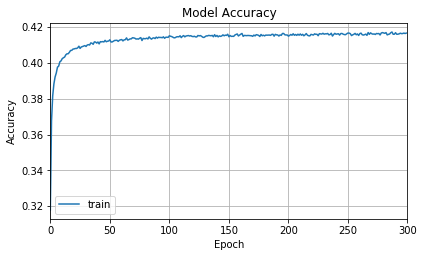

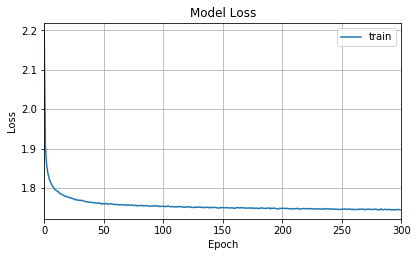

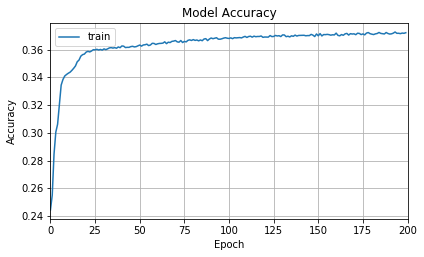

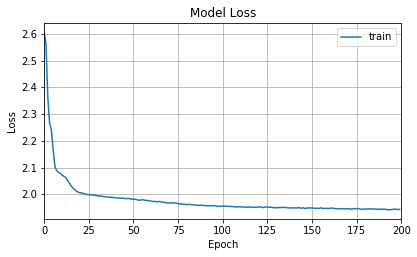

In [58]:
#show TrackNet details, save it as TrackNet.png
plot_model( model , show_shapes=True , to_file='DNN_result.png')
#  "Accuracy"
# print(history.history)
plt.figure(figsize=(6.4,3.6))
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0, epoch)
plt.legend(['train'])
plt.grid()
plt.show()
# "Loss"
plt.figure(figsize=(6.4,3.6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0, epoch)
plt.legend(['train'])
plt.grid()
plt.show()


#show TrackNet details, save it as TrackNet.png
plot_model( model_cnn , show_shapes=True , to_file='CNN_result.png')
#  "Accuracy"
# print(history.history)
plt.figure(figsize=(6.4,3.6))
plt.plot(history_cnn.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0, epoch_cnn)
plt.legend(['train'])
plt.grid()
plt.show()
# "Loss"
plt.figure(figsize=(6.4,3.6))
plt.plot(history_cnn.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0, epoch_cnn)
plt.legend(['train'])
plt.grid()
plt.show()

# Get new test data from xhamster

In [17]:
import requests as rq
from bs4 import BeautifulSoup
import numpy as np
import csv
import pandas as pd

channellist = ['Amateur', 'Anal', 'Arab', 'Asian', 'Babes', 'Babysitters', 'BBW', 'BDSM', 'Beach', 'BigBoobs', 'Bisexuals', 'BlackandEbony', 'BlackGays', 'Blondes', 'Blowjobs', 'Brazilian', 'British', 'Brunettes', 'Bukkake', 'Cartoons', 'Celebrities', 'Chinese', 'Close-ups', 'CreamPie', 'Cuckold', 'Cumshots', 'Czech', 'Danish', 'DoublePenetration', 'Emo', 'FaceSitting', 'Facials', 'Femdom', 'Fingering', 'Flashing', 'FootFetish', 'French', 'Funny', 'Gangbang', 'Gaping', 'Gays', 'German', 'Gothic', 'Grannies', 'GroupSex', 'Hairy', 'Handjobs', 'Hardcore', 'Hentai', 'HiddenCams', 'Indian', 'Interracial', 'Italian', 'Japanese', 'Korean', 'Ladyboys', 'Latex', 'Latin', 'Lesbians', 'Lingerie', 'Massage', 'Masturbation', 'Matures', 'Men', 'Midgets', 'MILFs', 'Nipples', 'Old+Young', 'Pornstars', 'POV', 'PublicNudity', 'Redheads', 'Russian', 'SexToys', 'Shemales', 'Showers', 'Softcore', 'Spanking', 'Squirting', 'Stockings', 'Strapon', 'Swedish', 'Swingers', 'Teens', 'Thai', 'Threesomes', 'Tits', 'Turkish', 'Upskirts', 'Vintage', 'Voyeur', 'Webcams']
print(len(channellist))
upload_date = []    #done
nb_votes = []       #done
nb_comments = []    #done
channels = []       #done
runtime = []        #done
nb_views = []       #done
for testidx in range(0,50):
    print("times = ",testidx)
    url = "https://xhamster.com/"
    response = rq.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    av = soup.findAll("a", {"class": "video-thumb-info__name"})
    cnt=0
    for i in av:
        if cnt==10:
            break
        perurl = i.get('href')
        perresponse = rq.get(perurl)
        persoup = BeautifulSoup(perresponse.text, "html.parser")
        print("i = ",cnt)

        data = persoup.findAll("meta",  itemprop="duration")
        if 'H' in data[0].get('content'):
            continue
        minute = int(data[0].get('content').split('T')[-1].split('M')[0])
        second = int(data[0].get('content').split('M')[-1].split('S')[0])
        duration = minute * 60 + second
        runtime += [duration]

        data = persoup.findAll("meta",  itemprop="interactionCount")
        idx = int(int(data[3].get('content').split(':')[-1])/10000)
        if idx >= 30:
            tmp=30
        else:
            tmp=idx
        nb_views += [tmp]

        like = int(data[1].get('content').split(':')[-1])
        unlike = int(data[2].get('content').split(':')[-1])
        nb_votes += [like-unlike]

        nb_comments += [int(data[0].get('content').split(':')[-1])]

        

        data = persoup.findAll("div",  itemprop="datePublished uploadDate")
        year = data[0].get('content').split('-')[0]
        upload_date += [year]

        data = persoup.findAll("meta",  itemprop="name")
        record = [0 for _ in range(len(channellist))]
#         print(len(data))
        for idx in range(3,len(data)):
            # print("content = ",data[idx].get('content'))
            if data[idx].get('content') in channellist :
                channelidx = channellist.index(data[idx].get('content'))
                record[channelidx] = 1

        # print(record)
        channels +=[record]
        cnt+=1

print("========= below is target ============")
print(np.shape(nb_views))
print("========= below is feature ============")
print(np.shape(nb_votes))
print(np.shape(nb_comments))
print(np.shape(runtime))
print(np.shape(upload_date))
print(np.shape(channels))
print("========= end ============")

92
times =  0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  1
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  2
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  3
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  4
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  5
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  6
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  7
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  8
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  9
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  10
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  11
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
times =  12
i =  0
i = 

In [59]:
df = pd.DataFrame(np.array(upload_date), columns=['upload_date'])
df['nb_votes'] = np.array(nb_votes)
df['nb_comments'] = np.array(nb_comments)
df['runtime'] = np.array(runtime)
df['nb_views'] = np.array(nb_views)

from sklearn.preprocessing import MinMaxScaler
X = df[['nb_votes','nb_comments','runtime']].copy()
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# print(X)

df['nb_votes'] = (df['nb_votes'] - ft.nb_votes_min)/(ft.nb_votes_max - ft.nb_votes_min)
df['nb_comments'] = (df['nb_comments'] - ft.nb_comments_min)/(ft.nb_comments_max - ft.nb_comments_min)
df['runtime'] = (df['runtime'] - ft.runtime_min)/(ft.runtime_max - ft.runtime_min)


# df['nb_votes'] = (df['nb_votes'] - df['nb_votes'].min())/(df['nb_votes'].max()-df['nb_votes'].min())
# df['nb_comments'] = (df['nb_comments'] - df['nb_comments'].min())/(df['nb_comments'].max()-df['nb_comments'].min())
# df['runtime'] = (df['runtime'] - df['runtime'].min())/(df['runtime'].max()-df['runtime'].min())
# print(df)
test_new_feature=np.array(np.array([channels]))
test_new_feature = test_new_feature[0]
new_test_all = np.concatenate((df[['nb_votes','nb_comments','runtime']],test_new_feature), axis=1)
# new_test_all = np.concatenate((X,test_new_feature), axis=1)
# new_test_all = np.concatenate((df[['nb_votes']],df[['nb_comments']],df[['runtime']]), axis=1)
print(new_test_all)

[[0.0004659  0.         0.00021794 ... 0.         0.         0.        ]
 [0.00081533 0.00113122 0.00025826 ... 0.         0.         0.        ]
 [0.0009318  0.00113122 0.00017472 ... 0.         0.         0.        ]
 ...
 [0.01036632 0.02488688 0.00023647 ... 0.         0.         0.        ]
 [0.01811193 0.01357466 0.0002619  ... 0.         0.         0.        ]
 [0.00372721 0.00678733 0.00015038 ... 0.         0.         0.        ]]


/home/ino/anaconda3/envs/TrackNet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [60]:
print(np.shape(new_test_all))
new_test_target  = df[['nb_views']].copy()
new_test_target  = to_categorical(new_test_target, num_classes=31)

print("==========below is DNN result============")
score = model.evaluate(new_test_all,new_test_target)
print ('\nTrain Acc:', score[1])
# print(score)

new_test_all_cnn = new_test_all[:, :,np.newaxis]
print("==========below is CNN result============")
score = model_cnn.evaluate(new_test_all_cnn,new_test_target)
print ('\nTrain Acc:', score[1])

(500, 95)
==========below is DNN result============
500/500 [==============================] - 0s 93us/step

Train Acc: 0.37799999976158144
==========below is CNN result============
500/500 [==============================] - 0s 35us/step

Train Acc: 0.3140000001192093
